# Multiple Linear Regression Using Sklearn

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
247,39.4,4,85.0,70,2070,18.6,78,3,datsun b210 gx
254,20.2,6,200.0,85,2965,15.8,78,1,ford fairmont (auto)
272,23.8,4,151.0,85,2855,17.6,78,1,oldsmobile starfire sx
329,44.6,4,91.0,67,1850,13.8,80,3,honda civic 1500 gl
99,18.0,6,232.0,100,2945,16.0,73,1,amc hornet
22,25.0,4,104.0,95,2375,17.5,70,2,saab 99e
359,28.1,4,141.0,80,3230,20.4,81,2,peugeot 505s turbo diesel
115,15.0,8,350.0,145,4082,13.0,73,1,chevrolet monte carlo s
352,29.9,4,98.0,65,2380,20.7,81,1,ford escort 2h
327,36.4,5,121.0,67,2950,19.9,80,2,audi 5000s (diesel)


### Checking Null Values



In [4]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)

In [7]:
df['horsepower'].fillna(df['horsepower'].median(), inplace = True)

In [8]:
df['horsepower'] = df['horsepower'].astype(float)

# EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='weight', ylabel='mpg'>

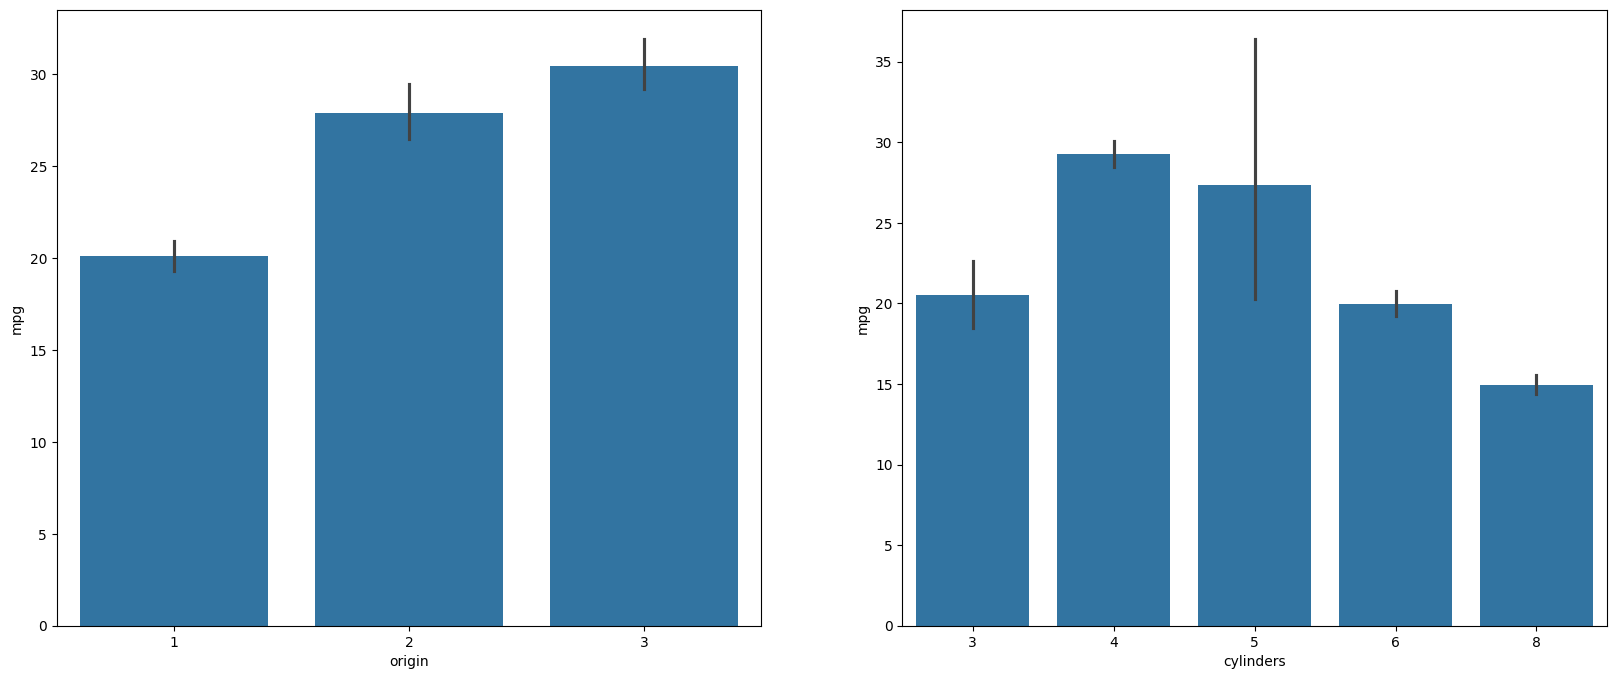

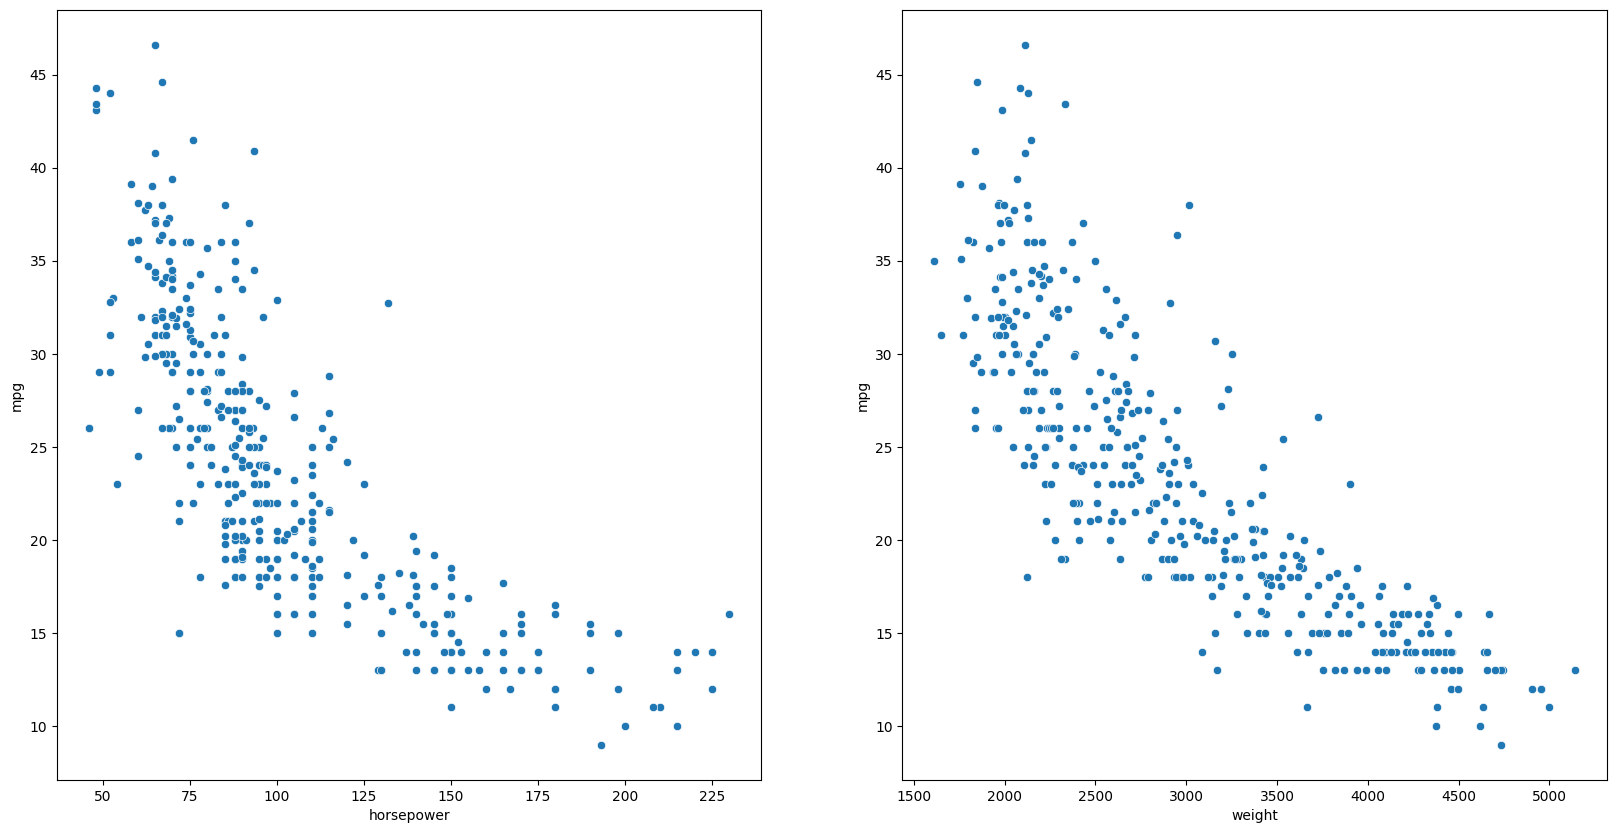

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(x=df['origin'], y=df['mpg'])
plt.subplot(1,2,2)
sns.barplot(x=df['cylinders'], y=df['mpg'])
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(x=df['horsepower'], y=df['mpg'])
plt.subplot(1,2,2)
sns.scatterplot(x=df['weight'], y=df['mpg'])

<Axes: ylabel='horsepower'>

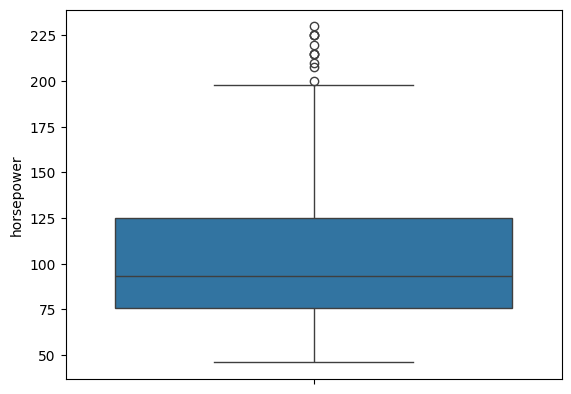

In [11]:
sns.boxplot(df['horsepower'])

<Axes: xlabel='model year', ylabel='mpg'>

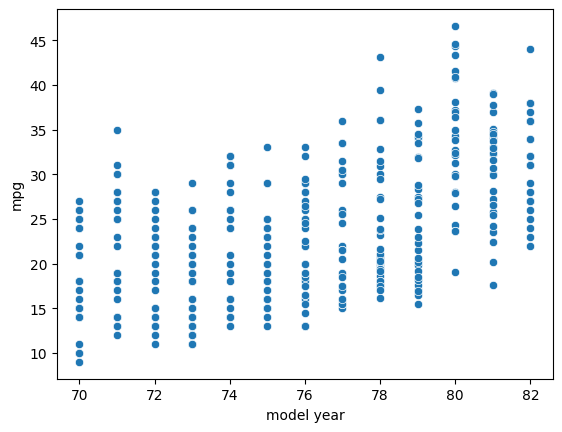

In [12]:
sns.scatterplot(x=df['model year'], y=df['mpg'])

### Preprocessing


In [13]:
num_features = ['displacement', 'horsepower', 'weight', 'acceleration']
cat_features = ['origin', 'cylinders', 'model year']

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

### Model Training

In [15]:
X = df.drop(columns = ['mpg', 'car name'], axis=1)
y = df['mpg']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [18]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['origin', 'cylinders',
                                                   'model year'])])),
                ('model', LinearRegression())])

In [19]:
y_pred = pipeline.predict(X_test)

### Model Evaluation

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7.456375676125506
R-squared: 0.8613191582691294
